In [1]:
import numpy as np
x = np.array(12)
x

array(12)

In [2]:
x.ndim

0

In [3]:
x = np.array([1, 2, 3, 4, 5])
x

array([1, 2, 3, 4, 5])

In [4]:
x.ndim

1

In [6]:
x = np.array([
              [5, 4, 3, 2, 1],
              [1, 2, 3, 4, 5],
              [11, 12, 13, 14, 15]
])
x.ndim

2

In [15]:
x = np.array([[
               [1, 2, 3, 4, 5],
               [1, 2, 3, 4, 5]],
               [[1, 2, 3, 4, 5],
               [1, 2, 3, 4, 5]],
               [[1, 2, 3, 4, 5],
                [1, 2, 3, 4, 5]]
])
print(x.ndim)
print(x.shape)

3
(3, 2, 5)


In [0]:
def naive_add_matrix_and_vector(x, y):
  assert len(x.shape) == 2 # x = 2d numpy array
  assert len(y.shape) == 1 # y = numpy vector
  assert x.shape[1] == y.shape[0]

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[j]

  return x

In [27]:
import numpy as np

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z  = np.maximum(x, y)

print(x.shape, y.shape, z.shape)
print(x.shape[1], y.shape[0])
print(x.ndim, y.ndim, z.ndim)

def naive_vector_dot(x, y):
  assert len(x.shape) == 1 
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]

  z = 0
  for i in range(x.shape[0]):
    z += x[i] * y[i]
  return z

def naive_matrix_vector_dot(x, y):

  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i, j] * y[j]
  return z

def naive_matrix_dot(x, y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == x.shape[0]

  z = np.zeros((x.shape[0], y.shape[1]))
  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      row_x = x[i, :]
      column_y = y[:, j]
      z[i, j] = naive_vector_dot(row_x, row_y)
      
  return z



(64, 3, 32, 10) (32, 10) (64, 3, 32, 10)
3 32
4 2 4


In [33]:
x = np.array([[0., 1.],
              [2., 3.,],
              [4., 5.]])
print(x.shape)

x = x.reshape((6, 1))
print(x.shape)

print(x)
x = x.reshape((2, 3))
print(x)

(3, 2)
(6, 1)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
[[0. 1. 2.]
 [3. 4. 5.]]


In [35]:
x = np.zeros((300, 20))
x = np.transpose(x)
print(x.shape)

(20, 300)


영화 리뷰 분류

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 1s 0us/step


In [3]:
train_labels[0]

1

In [4]:
max([max(sequence) for sequence in train_data])

9999

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [9]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i,  sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [20]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, 
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 179us/step - loss: 0.5258 - acc: 0.7908 - val_loss: 0.4029 - val_acc: 0.8682
Epoch 2/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.3221 - acc: 0.9027 - val_loss: 0.3137 - val_acc: 0.8873
Epoch 3/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.2374 - acc: 0.9221 - val_loss: 0.2877 - val_acc: 0.8854
Epoch 4/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.1818 - acc: 0.9415 - val_loss: 0.2734 - val_acc: 0.8914
Epoch 5/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.1476 - acc: 0.9543 - val_loss: 0.2843 - val_acc: 0.8866
Epoch 6/20
15000/15000 [==============================] - 1s 69us/step - loss: 0.1219 - acc: 0.9632 - val_loss: 0.2897 - val_acc: 0.8870
Epoch 7/20
15000/15000 [==============================] - 1s 68us/step - loss: 0.1023 - acc: 0.9690 - val_loss: 0.3067 - val_ac

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

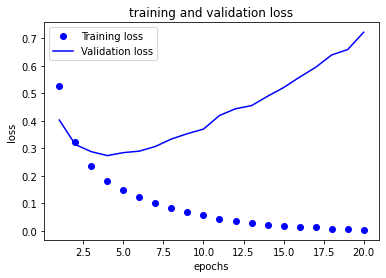

In [23]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

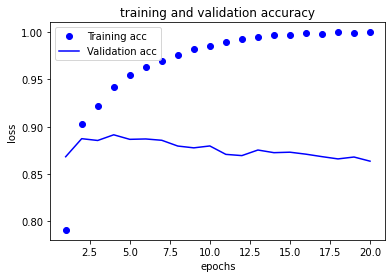

In [24]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.show()

In [25]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 1s 48us/step - loss: 0.4457 - accuracy: 0.8166
Epoch 2/4
25000/25000 [==============================] - 1s 45us/step - loss: 0.2547 - accuracy: 0.9106
Epoch 3/4
25000/25000 [==============================] - 1s 45us/step - loss: 0.1961 - accuracy: 0.9296
Epoch 4/4
25000/25000 [==============================] - 2s 79us/step


In [26]:
results

[0.3011960497665405, 0.8823999762535095]

In [27]:
model.predict(x_test)

array([[0.19725138],
       [0.99977   ],
       [0.9640344 ],
       ...,
       [0.12788467],
       [0.07789367],
       [0.7196239 ]], dtype=float32)

뉴스 기사 분류

In [0]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [59]:
len(train_data)

8982

In [60]:
len(test_data)

2246

In [61]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [78]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [79]:
train_labels[10]

3

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [86]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 0s 58us/step - loss: 2.5815 - accuracy: 0.5292 - val_loss: 1.7128 - val_accuracy: 0.6500
Epoch 2/20
7982/7982 [==============================] - 0s 49us/step - loss: 1.4036 - accuracy: 0.7105 - val_loss: 1.2910 - val_accuracy: 0.7100
Epoch 3/20
7982/7982 [==============================] - 0s 48us/step - loss: 1.0413 - accuracy: 0.7737 - val_loss: 1.1063 - val_accuracy: 0.7630
Epoch 4/20
7982/7982 [==============================] - 0s 50us/step - loss: 0.8069 - accuracy: 0.8316 - val_loss: 1.0095 - val_accuracy: 0.7890
Epoch 5/20
7982/7982 [==============================] - 0s 49us/step - loss: 0.6367 - accuracy: 0.8698 - val_loss: 0.9447 - val_accuracy: 0.8090
Epoch 6/20
7982/7982 [==============================] - 0s 49us/step - loss: 0.5046 - accuracy: 0.8955 - val_loss: 0.9055 - val_accuracy: 0.8020
Epoch 7/20
7982/7982 [==============================] - 0s 49us/step - loss: 0.402

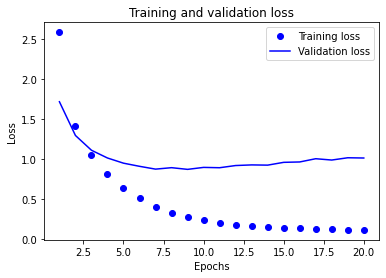

In [87]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

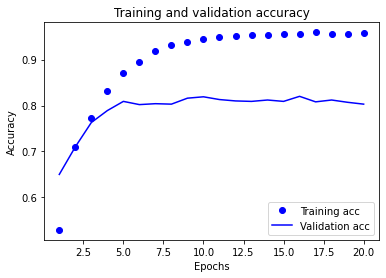

In [93]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [89]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 0s 57us/step - loss: 2.6740 - accuracy: 0.5288 - val_loss: 1.7385 - val_accuracy: 0.6400
Epoch 2/9
7982/7982 [==============================] - 0s 49us/step - loss: 1.4244 - accuracy: 0.7048 - val_loss: 1.2946 - val_accuracy: 0.7180
Epoch 3/9
7982/7982 [==============================] - 0s 50us/step - loss: 1.0546 - accuracy: 0.7709 - val_loss: 1.1202 - val_accuracy: 0.7530
Epoch 4/9
7982/7982 [==============================] - 0s 49us/step - loss: 0.8301 - accuracy: 0.8173 - val_loss: 1.0292 - val_accuracy: 0.7850
Epoch 5/9
7982/7982 [==============================] - 0s 48us/step - loss: 0.6533 - accuracy: 0.8641 - val_loss: 0.9592 - val_accuracy: 0.7980
Epoch 6/9
7982/7982 [==============================] - 0s 50us/step - loss: 0.5176 - accuracy: 0.8928 - val_loss: 0.9389 - val_accuracy: 0.8010
Epoch 7/9
7982/7982 [==============================] - 0s 50us/step - loss: 0.4164 - acc

In [90]:
results

[1.032216921302748, 0.7760462760925293]

In [91]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.18521816562778273

In [0]:
predictions = model.predict(x_test)

In [95]:
predictions[0].shape

(46,)

In [96]:
np.sum(predictions[0])

0.99999994

In [97]:
np.argmax(predictions[0])

3

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [101]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 74us/step - loss: 3.0736 - accuracy: 0.4002 - val_loss: 2.4261 - val_accuracy: 0.5140
Epoch 2/20
7982/7982 [==============================] - 0s 60us/step - loss: 1.9801 - accuracy: 0.5613 - val_loss: 1.7732 - val_accuracy: 0.5740
Epoch 3/20
7982/7982 [==============================] - 0s 61us/step - loss: 1.5444 - accuracy: 0.6179 - val_loss: 1.5839 - val_accuracy: 0.6080
Epoch 4/20
7982/7982 [==============================] - 0s 60us/step - loss: 1.3631 - accuracy: 0.6463 - val_loss: 1.5260 - val_accuracy: 0.6170
Epoch 5/20
7982/7982 [==============================] - 0s 62us/step - loss: 1.2488 - accuracy: 0.6718 - val_loss: 1.5056 - val_accuracy: 0.6330
Epoch 6/20
7982/7982 [==============================] - 0s 60us/step - loss: 1.1580 - accuracy: 0.6987 - val_loss: 1.4894 - val_accuracy: 0.6570
Epoch 7/20
7982/7982 [==============================] - 0s 61us/step - loss: 1.083

In [102]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 70us/step - loss: 2.9902 - accuracy: 0.2393 - val_loss: 2.2265 - val_accuracy: 0.5840
Epoch 2/20
7982/7982 [==============================] - 0s 60us/step - loss: 1.7557 - accuracy: 0.6248 - val_loss: 1.5777 - val_accuracy: 0.6410
Epoch 3/20
7982/7982 [==============================] - 0s 60us/step - loss: 1.3386 - accuracy: 0.6891 - val_loss: 1.4176 - val_accuracy: 0.6770
Epoch 4/20
7982/7982 [==============================] - 0s 61us/step - loss: 1.1657 - accuracy: 0.7225 - val_loss: 1.3808 - val_accuracy: 0.6790
Epoch 5/20
7982/7982 [==============================] - 0s 61us/step - loss: 1.0439 - accuracy: 0.7440 - val_loss: 1.3487 - val_accuracy: 0.6990
Epoch 6/20
7982/7982 [==============================] - 0s 61us/step - loss: 0.9501 - accuracy: 0.7657 - val_loss: 1.3317 - val_accuracy: 0.6940
Epoch 7/20
7982/7982 [==============================] - 0s 61us/step - loss: 0.864